# Maltese Dataset

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re

# Concatenate the datasets
combined_df = pd.read_csv('../ToxicCommentCollectionCode/shuffled_augmented_dataset.csv')

# Save the combined dataset to a new CSV file
combined_df.to_csv('../Datasets/Dataset_Maltese/maltese_dataset.csv', index=False)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk

# Unique list of Maltese stop words
# Load Maltese stopwords from the provided file
with open('../ToxicCommentCollectionCode/cleaned_maltese_stopwords.txt', 'r') as file:
    maltese_stopwords = set(file.read().split())


def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove user mentions (assuming they start with @)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    text = text.replace('"', '')
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text
    words = text.split()
    
    # Join the words back into a single string
    text = ' '.join(words)
    
    return text

# Assuming combined_df is your DataFrame
# Remove rows with null or empty values in the 'comment' column
combined_df = combined_df.dropna(subset=['comment'])
combined_df = combined_df[combined_df['comment'].str.strip() != '']

# Apply cleaning function to the comments
combined_df['comment'] = combined_df['comment'].apply(clean_text)

# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1).reset_index(drop=True)


In [18]:
print("\nTraining dataset - isToxic counts:")
print(combined_df['isToxic'].value_counts())


Training dataset - isToxic counts:
isToxic
0    3310
1    2185
Name: count, dtype: int64


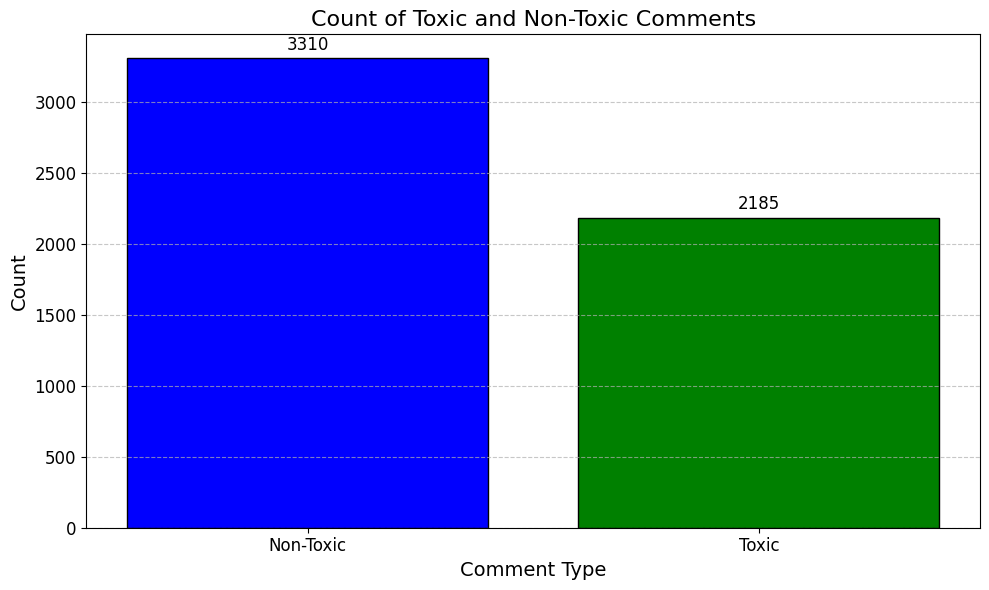

In [19]:
import matplotlib.pyplot as plt

# Get value counts
toxic_counts = combined_df['isToxic'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(toxic_counts.index, toxic_counts.values, color=['blue', 'green'], edgecolor='black')

# Adding details
plt.title('Count of Toxic and Non-Toxic Comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Non-Toxic', 'Toxic'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12)

# Adding a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [20]:
combined_df.to_csv('../Analysis.csv', index=False)

In [21]:
combined_df.drop_duplicates()

# Check for null values
print("Checking for null values...")
print(combined_df.isnull().sum())

# Fill or drop null values (choose one based on your preference)
combined_df['comment'].fillna('', inplace=True)  # Fill with empty string

combined_df['comment'] = combined_df['comment'].astype(str)

# Split the combined dataset into training and test sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df['isToxic'], random_state=42)

# Save the training and test sets to separate CSV files
train_df.to_csv('../Datasets/Dataset_Maltese/train/train.csv', index=False)
test_df.to_csv('../Datasets/Dataset_Maltese/test/test.csv', index=False)

print("Training and test datasets created and saved to 'train_dataset.csv' and 'test_dataset.csv'")

print("\nTraining dataset - isToxic counts:")
print(train_df['isToxic'].value_counts())

print("\nTest dataset - isToxic counts:")
print(test_df['isToxic'].value_counts())

Checking for null values...
comment    0
isToxic    0
dtype: int64
Training and test datasets created and saved to 'train_dataset.csv' and 'test_dataset.csv'

Training dataset - isToxic counts:
isToxic
0    2648
1    1748
Name: count, dtype: int64

Test dataset - isToxic counts:
isToxic
0    662
1    437
Name: count, dtype: int64


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the dataset
trainDataset = pd.read_csv('../Datasets/Dataset_Maltese/train/train.csv')

# Split the combined dataset into training and validation sets (70% train, 10% val)
train_df, val_df = train_test_split(trainDataset, test_size=0.125, random_state=42)

# Save the training and validation sets to CSV files
train_df.to_csv('../Datasets/Dataset_Maltese/train/validation/train.csv', index=False)
val_df.to_csv('../Datasets/Dataset_Maltese/train/validation/val.csv', index=False)

# Display the size of the training and validation sets
print(f"Training set size: {train_df.shape[0]} rows")
print(f"Validation set size: {val_df.shape[0]} rows")

Training set size: 3846 rows
Validation set size: 550 rows


In [15]:
def shuffle_csv(input_file, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file)
    
    # Ensure 'is_toxic' column is kept as an integer
    if 'is_toxic' in df.columns:
        df['is_toxic'] = df['is_toxic'].astype(int)
    
    # Shuffle the DataFrame
    shuffled_df = df.sample(frac=1).reset_index(drop=True)
    
    # Save the shuffled DataFrame to a new CSV file
    shuffled_df.to_csv(output_file, index=False)

# Example usage
input_csv = '../Datasets/Dataset_Maltese/train/validation/train.csv'
output_csv = '../Datasets/Dataset_Maltese/train/validation/train.csv'
shuffle_csv(input_csv, output_csv)

# English Dataset

In [9]:
import numpy as np 
import pandas as pd 
import os

import os
for dirname, _, filenames in os.walk('Datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
 # Concatenate the datasets
train_df = pd.read_csv('../Datasets/Dataset_English/jigsaw-toxic-comment-classification-challenge/train.csv.zip')

In [17]:
import re
from collections import Counter

import pandas as pd
from nltk.corpus import stopwords as nltk_stopwords

# Preprocessing train dataset
# Lowercasing commentaries
train_df["comment_text_preprocessed"] = train_df["comment_text"].str.lower()

# Removing stopwords
eng_stopwords = set(nltk_stopwords.words('english'))
eng_stopwords.update(["i'm", "that's", "can't"])

def clear_stopwords(comment_text, stopwords=eng_stopwords):
    """Removes stopwords from the commentary text."""
    comment_text_cleared = [word for word in str(comment_text).split() if word not in stopwords]
    return " ".join(comment_text_cleared)

train_df["comment_text_preprocessed"] = train_df["comment_text_preprocessed"].apply(lambda comment_text: clear_stopwords(comment_text))

# Removing top-10 most frequent words
word_counter = Counter()
for comment_text in train_df["comment_text_preprocessed"].values:
    for word in comment_text.split():
        word_counter[word] += 1

freq_words = set([word for (word, word_count) in word_counter.most_common(10)])

def clear_freqwords(comment_text, freqwords=freq_words):
    """Removes top-10 frequent words."""
    comment_text_cleared = [word for word in str(comment_text).split() if word not in freq_words]
    return " ".join(comment_text_cleared)

train_df["comment_text_preprocessed"] = train_df["comment_text_preprocessed"].apply(lambda comment_text: clear_freqwords(comment_text))

# Removing top-10 rarest words
rare_words_num = 10
rare_words = set([word for (word, word_count) in word_counter.most_common()[:-rare_words_num-1:-1]])

def clear_rarewords(comment_text, rarewords=rare_words):
    """Removes top-10 rarest words."""
    comment_text_cleared = [word for word in str(comment_text).split() if word not in rare_words]
    return " ".join(comment_text_cleared)

train_df["comment_text_preprocessed"] = train_df["comment_text_preprocessed"].apply(lambda comment_text: clear_rarewords(comment_text))

# Removing links
def clear_urls(comment_text):
    """Clears the comment text from URLs."""
    url_regex_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_regex_pattern.sub(r"", comment_text)

train_df["comment_text_preprocessed"] = train_df["comment_text_preprocessed"].apply(lambda comment_text: clear_urls(comment_text))

# Removing non-words
regex = re.compile(r"[a-zA-Z]+")

def leave_words_only(comment_text, regex=regex):
    """Removes non-word inclusions."""
    return " ".join(regex.findall(comment_text))

train_df["comment_text_preprocessed"] = train_df["comment_text_preprocessed"].apply(lambda comment_text: leave_words_only(comment_text))

# Secondary stopwords removal
other_eng_stopwords = [word for word in eng_stopwords if "'" in word]
other_eng_stopwords = [word.replace("'", "") for word in other_eng_stopwords]

# Adding additional stopwords
eng_stopwords.update(
    ["utc", "eg", "jpg", "didnt", "th", "oh", "im", "cant", "wp", "hi"]
)
eng_stopwords.update(other_eng_stopwords)

train_df["comment_text_preprocessed"] = train_df["comment_text_preprocessed"].apply(lambda comment_text: clear_stopwords(comment_text, stopwords=eng_stopwords))

train_df["comment_text_preprocessed"] = train_df["comment_text_preprocessed"].apply(lambda comment_text: clear_freqwords(comment_text))

# Combine target columns to create 'isToxic' column
train_df['isToxic'] = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)

# Rename the column 'comment_text_preprocessed' to 'comment'
train_df.rename(columns={'comment_text_preprocessed': 'comment'}, inplace=True)

# Select the required columns for the new CSV file
output_df = train_df[['comment', 'isToxic']]

# Save the preprocessed data to a new CSV file
output_df.to_csv('../Datasets/Dataset_English/preprocessed_english_dataset.csv', index=False)

# Display the sample preprocessed data
display(output_df.sample(5))


,comment,comment,isToxic
99959,link farm blog newish year old unsourced sales...,link farm blog newish year old unsourced sales...,0
45666,know addition scott van pelt personal attack p...,know addition scott van pelt personal attack p...,0
110305,embarrassing friend belligerent attitude ensur...,embarrassing friend belligerent attitude ensur...,0
102949,archives archive november february link archiv...,archives archive november february link archiv...,0
107416,mad issue creators said season starting year t...,mad issue creators said season starting year t...,0


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the dataset
trainDataset = pd.read_csv('../Datasets/Dataset_English/preprocessed_english_dataset.csv')

# Split the combined dataset into training and validation sets (80% train, 20% val)
train_df, val_df = train_test_split(trainDataset, test_size=0.2, random_state=42)

# Save the training and validation sets to CSV files
train_df.to_csv('../Datasets/Dataset_English/train/train.csv', index=False)
val_df.to_csv('../Datasets/Dataset_English/val/val.csv', index=False)

# Display the size of the training and validation sets
print(f"Training set size: {train_df.shape[0]} rows")
print(f"Validation set size: {val_df.shape[0]} rows")

Training set size: 143613 rows
Validation set size: 15958 rows
